In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read the CSV into DataFrame


In [2]:

# Load the data
file_path = Path('Data/diabetes.csv')
df = pd.read_csv(file_path)
df.head()



Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# EDA of Data


In [3]:
df.keys()


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.shape


(768, 9)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.corr()


Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

# Correlation Matrix


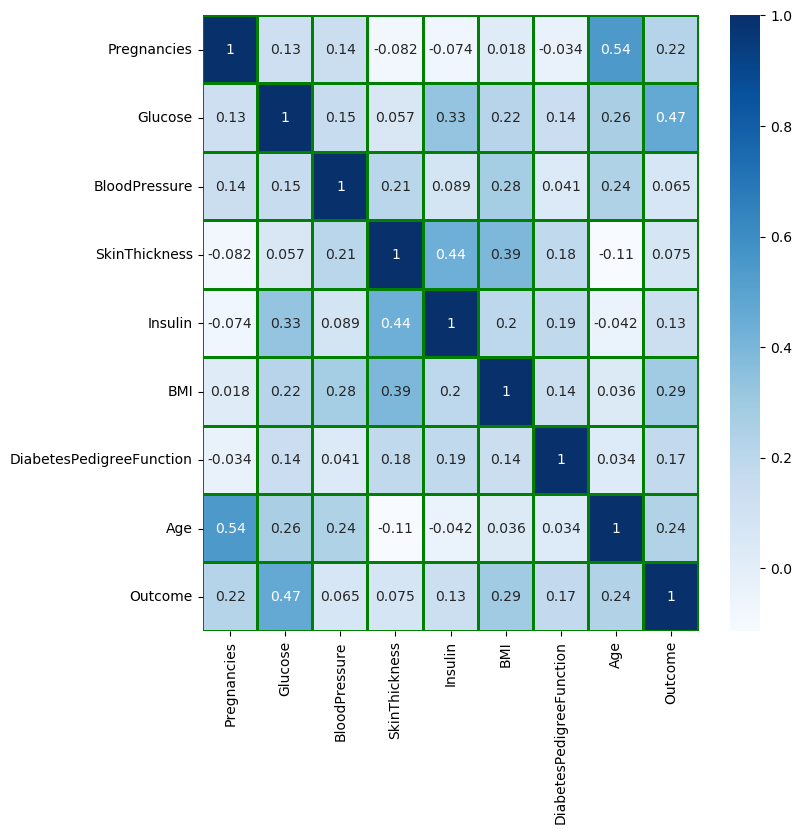

In [9]:
plt.figure(figsize=[8,8])
sns.heatmap(df.corr(),annot=True, cmap='Blues', linecolor='Green', linewidths=1.5)
plt.show()

# Pairplot of data


In [10]:
sns.pairplot(df)


# Count plot specifying the number of people suffering by diabetes


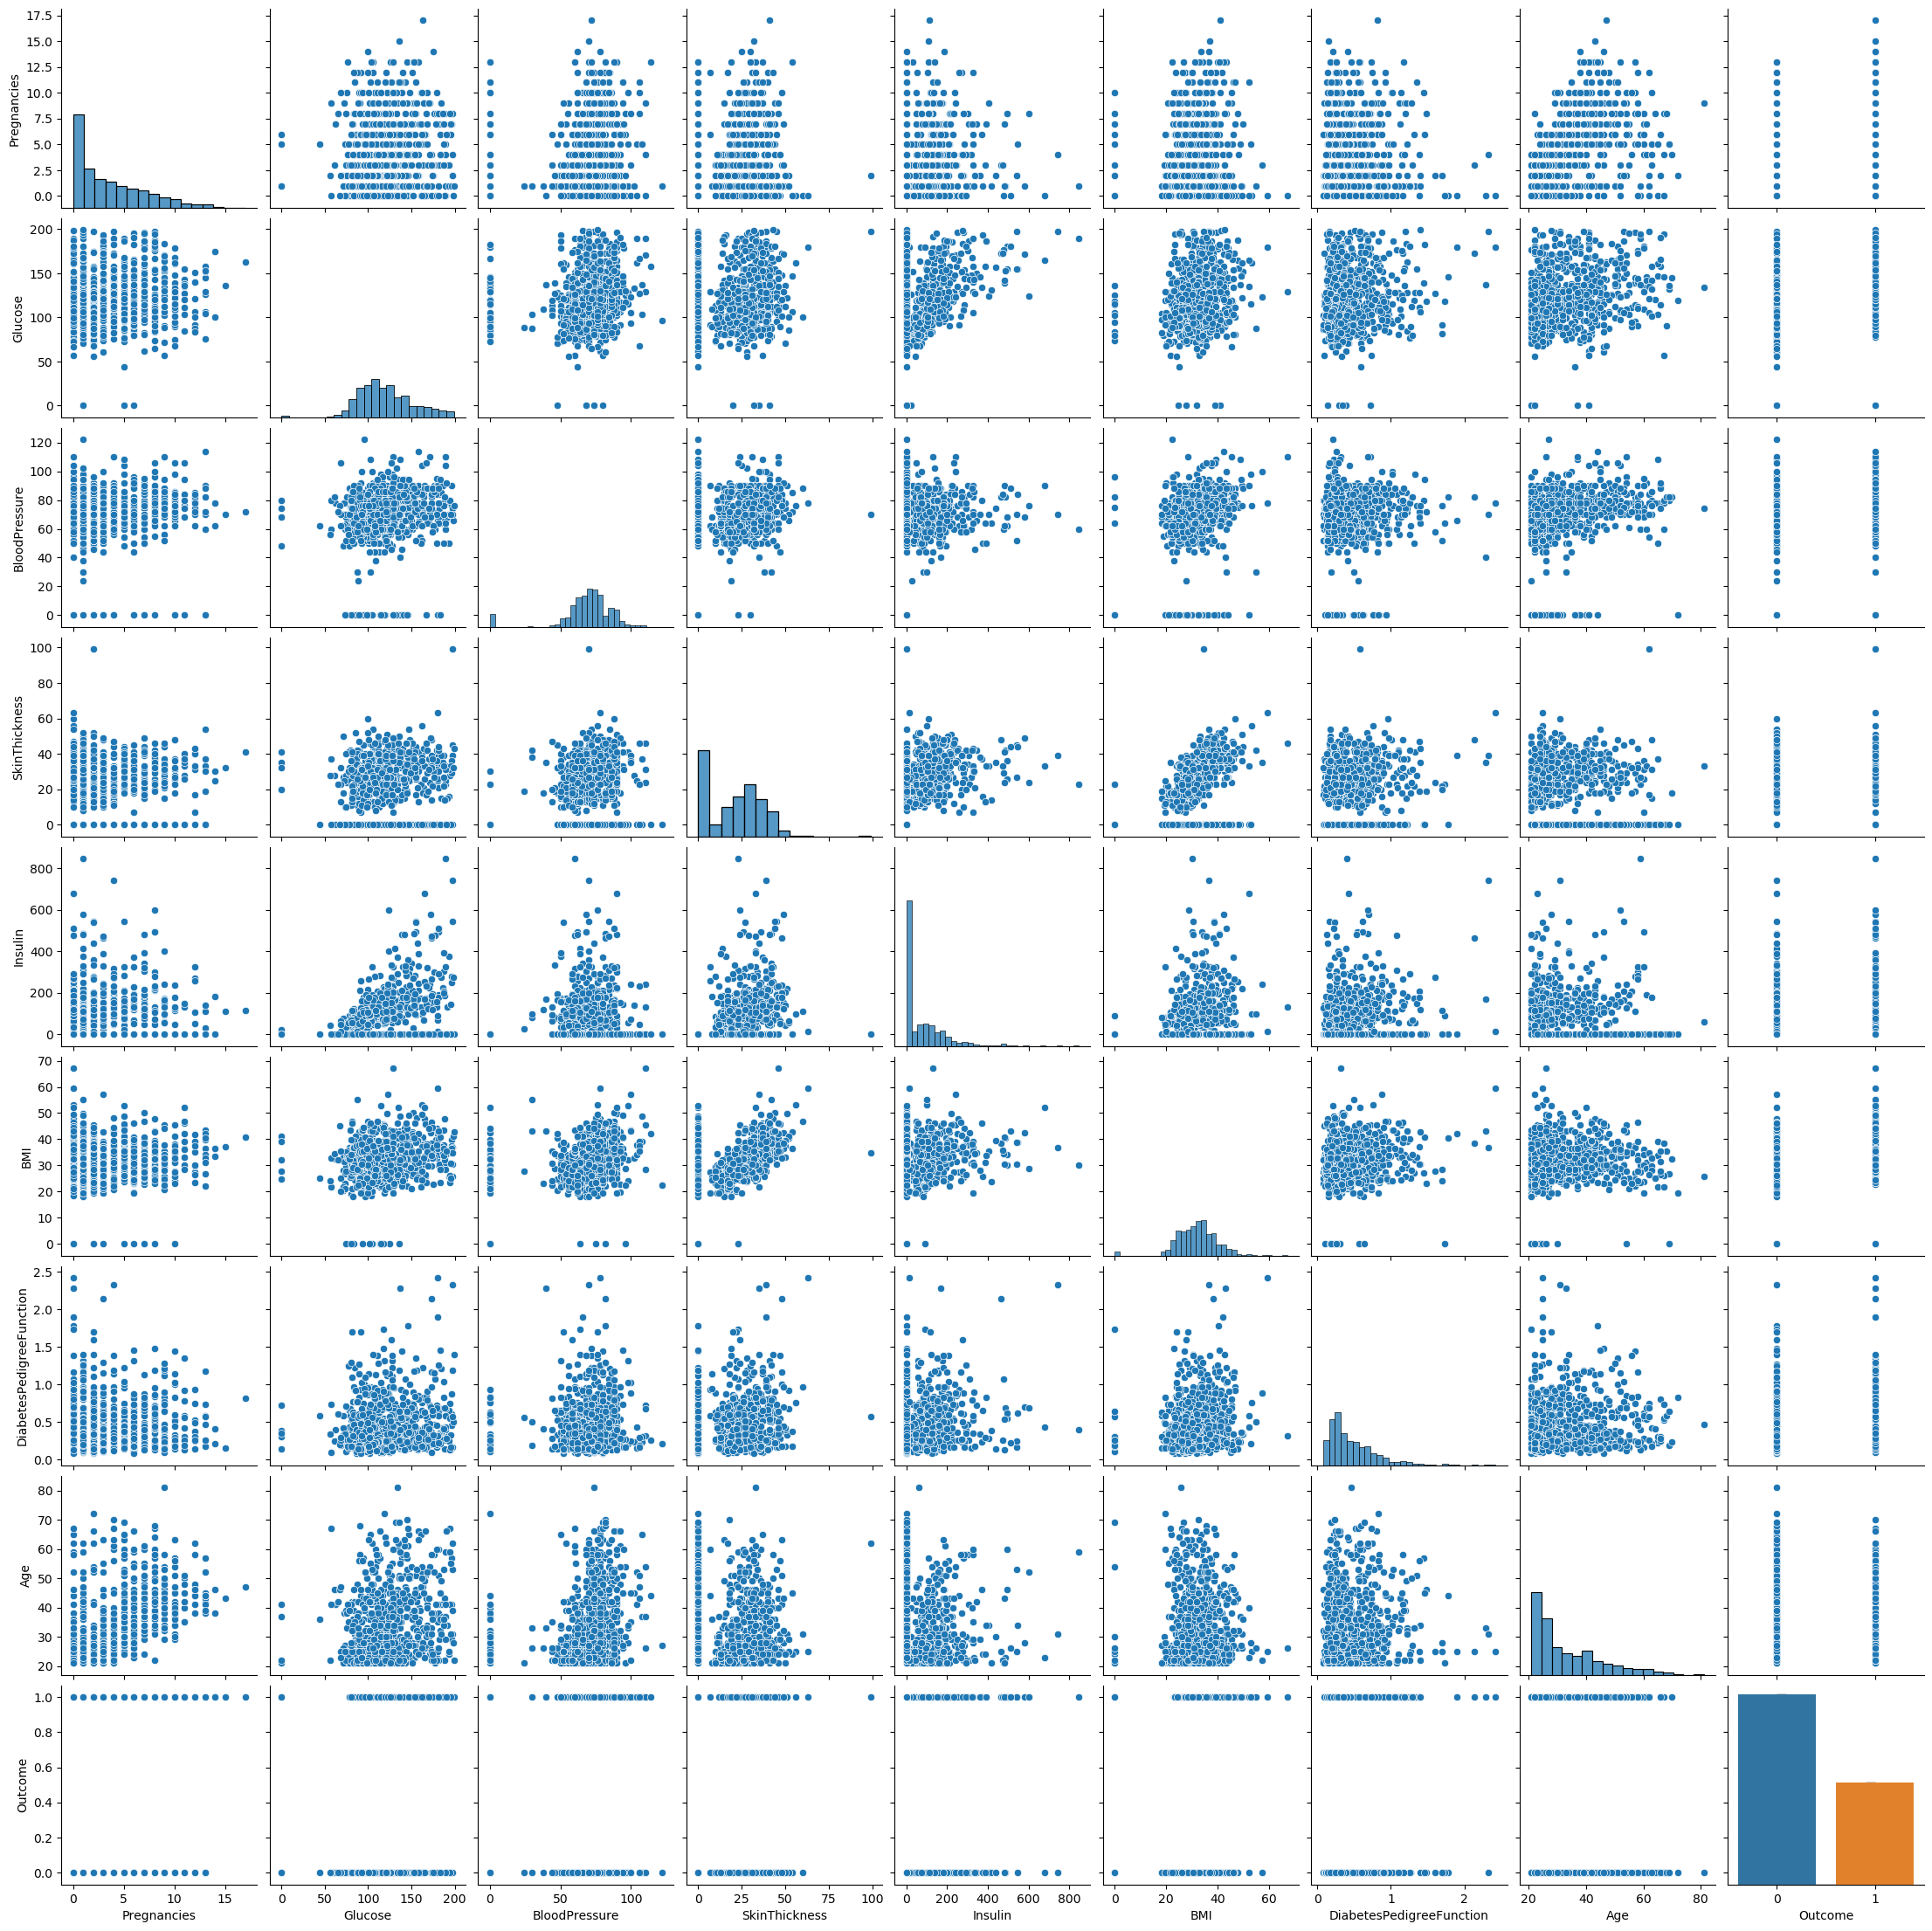

In [11]:
sns.countplot(df['Outcome'])
plt.show()


# Machine Learning Algorithms part


## Separating the data into features and target data


## Split the Data into Training and Testing



In [12]:
 # Create our features
X = df.drop(columns='Outcome')
X = pd.get_dummies(X)

# Create our target
target = ["Outcome"]
y = df.loc[:, target].copy()


In [13]:
X.describe() 

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

In [14]:
 # Check the balance of our target values
y['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Data Pre-Processing


## Scale the training and testing data using the StandardScaler from sklearn. We only scale the features data (X_train and X_testing).

In [16]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
 # Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [18]:
 # Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Support Vector Machines(SVM) Model


In [19]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [20]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred) 

0.5

In [21]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[123,   0],
       [ 69,   0]], dtype=int64)

In [22]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.64      1.00      0.00      0.78      0.00      0.00       123
          1       0.00      0.00      1.00      0.00      0.00      0.00        69

avg / total       0.41      0.64      0.36      0.50      0.00      0.00       192



# Oversampling

## Naive Random Oversampling


In [23]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

# View the count of target classes with Counter
Counter(y_resampled) 

Counter({'Outcome': 1})

In [24]:
# Train the Support Vector Machines(SVM) Model using the resampled data
model = SVC(kernel='linear')
model.fit(X_resampled,y_resampled)


SVC(kernel='linear')

In [25]:
 # Calculate the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.7661717921527041

In [26]:
 # Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[94, 29],
       [16, 53]], dtype=int64)

In [27]:
 # Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.76      0.77      0.81      0.77      0.59       123
          1       0.65      0.77      0.76      0.70      0.77      0.59        69

avg / total       0.78      0.77      0.77      0.77      0.77      0.59       192



# SMOTE Oversampling


In [28]:
 # Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train_scaled, y_train)
from collections import Counter

# View the count of target classes with Counter
Counter(y_resampled)

Counter({'Outcome': 1})

In [29]:
# Train the Support Vector Machines(SVM) Model using the resampled data
model = SVC(kernel='linear')
model.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [30]:
# Calculate the balanced accuracy score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.7728879462707671

In [31]:
 # Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[101,  22],
       [ 19,  50]], dtype=int64)

In [32]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.82      0.72      0.83      0.77      0.60       123
          1       0.69      0.72      0.82      0.71      0.77      0.59        69

avg / total       0.79      0.79      0.76      0.79      0.77      0.60       192



# Undersampling

In [33]:
# Resample the data using the ClusterCentroids resampler
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train_scaled, y_train)

# View the count of target classes with Counter
Counter(y_resampled)

Counter({'Outcome': 1})

In [34]:
# Train the Support Vector Machines(SVM) Model using the resampled data
model = SVC(kernel='linear')
model.fit(X_resampled,y_resampled) 

SVC(kernel='linear')

In [35]:
 # Calculated the balanced accuracy score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.7447861435136091

In [36]:
 # Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[103,  20],
       [ 24,  45]], dtype=int64)

In [37]:
 # Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.84      0.65      0.82      0.74      0.56       123
          1       0.69      0.65      0.84      0.67      0.74      0.54        69

avg / total       0.77      0.77      0.72      0.77      0.74      0.55       192



# Combination (Over and Under) Sampling


In [38]:
# Resample the training data with SMOTEENN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

# View the count of target classes with Counter
Counter(y_resampled)

Counter({'Outcome': 1})

In [39]:
# Train the Support Vector Machines(SVM) Model using the resampled data
model = SVC(kernel='linear')
model.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [40]:
# Calculate the balanced accuracy score
y_pred = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred)

0.7820784729586426

In [41]:
 # Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[89, 34],
       [11, 58]], dtype=int64)

In [42]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.72      0.84      0.80      0.78      0.60       123
          1       0.63      0.84      0.72      0.72      0.78      0.62        69

avg / total       0.80      0.77      0.80      0.77      0.78      0.61       192

